### Problem Statement: 

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

# Import module

In [ ]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Reading the data

In [ ]:
#Reading the application_data dataset
New_Data = pd.read_csv("application_data.csv")
New_Data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
#Reading the previous_application dataset
Prev_Data = pd.read_csv("previous_application.csv")
Prev_Data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
New_Data.shape

(307511, 122)

In [ ]:
Prev_Data.shape

(1670214, 37)

In [ ]:
New_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
Prev_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
New_Data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [ ]:
Prev_Data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Working on New_Data

In [ ]:
# Checking the percentage of mising values in the columns
(New_Data.isnull().sum()/len(New_Data)*100).sort_values(ascending = False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [ ]:
# Removing all the columns having more than 40% null values
New_Data = New_Data[New_Data.columns[New_Data.isnull().sum()/len(New_Data)*100 <= 40]]
New_Data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
New_Data.shape

(307511, 73)

In [ ]:
New_Data.columns[New_Data.isnull().sum()/len(New_Data)*100 > 0]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [ ]:
# we will not require some of the columns from the above and main table as they will not be usefull in any inference
delete_col = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR','FLAG_DOCUMENT_2', 
        'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
        'NAME_TYPE_SUITE', 'REGION_POPULATION_RELATIVE', 'FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 
        'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']
New_Data.drop(labels= delete_col, axis=1, inplace=True)

In [ ]:
New_Data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3'],
      dtype='object')

In [ ]:
New_Data.shape

(307511, 34)

In [ ]:
New_Data.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
NAME_HOUSING_TYPE                  0
NAME_INCOME_TYPE                   0
TARGET                             0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
AMT_CREDIT                         0
DAYS_EMPLOYED                      0
DAYS_BIRTH                         0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
R

### Check for Inconsistencies and Studing the data

In [ ]:
New_Data.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

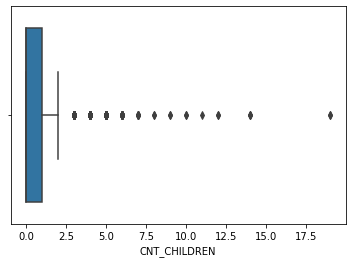

In [ ]:
sns.boxplot(New_Data.CNT_CHILDREN)
plt.show()

Clearly there are outliers in the CNT_CHILDERN column but we will consider then as correct data as it might impact the loan process

In [ ]:
New_Data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

There is a value called XNA which is unknown and as it is a very less in count and we can remove these 4 entries from the dataset as there is no suffinect information regarding this.

In [ ]:
New_Data.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [ ]:
New_Data.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

There is a value called "Unknown" which is unknown and as it is a very less in count and we can remove these 2 entries as we do not have suficient information about them.

In [ ]:
New_Data.DAYS_BIRTH.describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

As these are nagative values we can convert them into absolute values of year and bin them for proper analysis

In [ ]:
New_Data.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

As there is a big difference between the max and min values, so we can check if it contains any outliers and then bin the AMT_INCOME_TOTAL for better analysis.

In [ ]:
New_Data.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

We can check for any outliers and bin 'AMT_GOODS_PRICE' for better analysis.

In [ ]:
New_Data.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

Again we find there is a huge diference between the 75th percentile and the max anount so we will check for any outliers and again bin the column for better analysis

In [ ]:
New_Data.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

As it seems something like a CIBIL score and is a continous variable we can consider it as for our further analysis, by binning them.

## Data Manipulation

In [ ]:
#Handling 'XNA' in the 'CODE_GENDER' column --- Assigning 
New_Data = New_Data[New_Data.CODE_GENDER != "XNA"]
New_Data.CODE_GENDER.value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [ ]:
#Handling "Unknown"  in the 'NAME_FAMILY_STATUS' column ---- Dropping the Status = 'Unknown'
New_Data = New_Data[New_Data.NAME_FAMILY_STATUS != "Unknown"]
New_Data.NAME_FAMILY_STATUS.value_counts()

Married                 196429
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

In [ ]:
# Converting 'DAYS_BIRTH'  to its absolute form of 'AGE' and binning it
New_Data["AGE"] = abs(New_Data.DAYS_BIRTH)//365

In [ ]:
New_Data.AGE.describe()

count    307505.000000
mean         43.436116
std          11.954592
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [ ]:
# We can bin the AGE into 7 groups ranging from 20 to 70
New_Data["AGE_GROUP"] = pd.cut(New_Data.AGE, bins= 7)

In [ ]:
New_Data.AGE_GROUP.value_counts()

(34.0, 41.0]      59931
(27.0, 34.0]      55082
(41.0, 48.0]      52843
(48.0, 55.0]      48205
(55.0, 62.0]      43654
(19.951, 27.0]    29354
(62.0, 69.0]      18436
Name: AGE_GROUP, dtype: int64

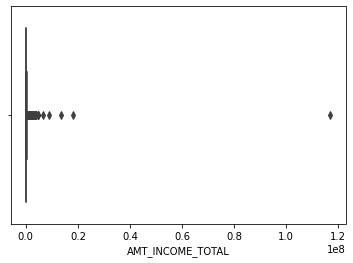

In [ ]:
# Binning 'AMT_INCOME_TOTAL'
#Check if 'AMT_INCOME_TOTAL' have any outliers
sns.boxplot(New_Data.AMT_INCOME_TOTAL)

So as there are some huge outliers in the data we can remove the outliers and work on it. So we can keep the 99 %ile of the data which will remove the outliers.

In [ ]:
# Removing the outliers
New_Data= New_Data[New_Data.AMT_INCOME_TOTAL < np.nanpercentile(New_Data.AMT_INCOME_TOTAL,99)]

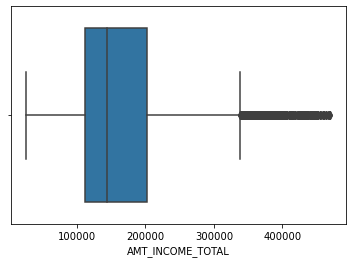

In [ ]:
sns.boxplot(New_Data.AMT_INCOME_TOTAL)

In [ ]:
# Binning of the 'AMT_INCOME_TOTAL' column
New_Data['INCOME_GROUP'] = pd.qcut(New_Data.AMT_INCOME_TOTAL, q=[0,0.2,0.4,0.6,0.8,1], 
                                         labels=['Very Low','Low','Medium','High','Very High'])

In [ ]:
New_Data.INCOME_GROUP.value_counts()

Low          85755
High         77336
Very Low     63671
Very High    44022
Medium       33627
Name: INCOME_GROUP, dtype: int64

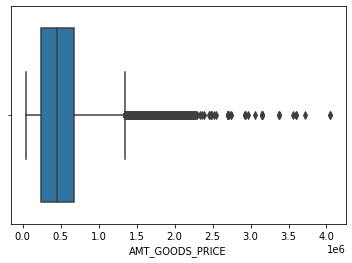

In [ ]:
# Binning 'AMT_GOODS_PRICE'
#Check if 'AMT_GOODS_PRICE' have any outliers

sns.boxplot(New_Data.AMT_GOODS_PRICE)

So as there are some huge outliers in the data we can remove the outliers and work on it. So we can keep the 99 %ile of the data which will remove the outliers.

In [ ]:
# Removing the outliers
New_Data= New_Data[New_Data.AMT_GOODS_PRICE < np.nanpercentile(New_Data.AMT_GOODS_PRICE,99)]

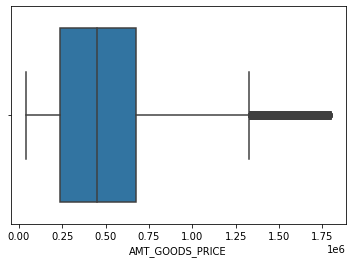

In [ ]:
sns.boxplot(New_Data.AMT_GOODS_PRICE)

In [ ]:
#Binning the "AMT_GOODS_PRICE"
New_Data['GOODS_PRICE_GROUP'] = pd.qcut(New_Data.AMT_GOODS_PRICE, q=[0,0.2,0.4,0.6,0.8,1], 
                                         labels=['Very Low','Low','Medium','High','Very High'])

In [ ]:
New_Data.GOODS_PRICE_GROUP.value_counts()

Very Low     71340
Medium       60582
Very High    59800
High         59424
Low          49858
Name: GOODS_PRICE_GROUP, dtype: int64

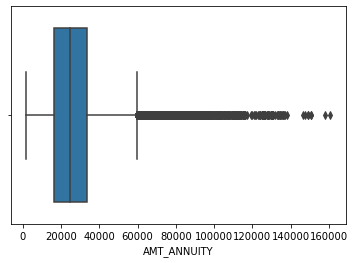

In [ ]:
# Binning 'AMT_ANNUITY'
#Check if 'AMT_ANNUITY' have any outliers
sns.boxplot(New_Data.AMT_ANNUITY)

So as there are some huge outliers in the data we can remove the outliers and work on it. So we can keep the 99 %ile of the data which will remove the outliers.

In [ ]:
# Removing the outliers
New_Data= New_Data[New_Data.AMT_ANNUITY < np.nanpercentile(New_Data.AMT_ANNUITY,99)]

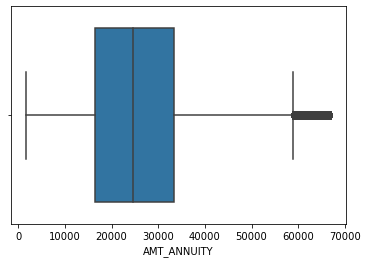

In [ ]:
sns.boxplot(New_Data.AMT_ANNUITY)

In [ ]:
# Bining of "AMT_ANNUITY"
New_Data['AMT_ANNUITY_GROUP'] = pd.qcut(New_Data.AMT_ANNUITY, q=[0,0.2,0.4,0.6,0.8,1], 
                                         labels=['Very Low','Low','Medium','High','Very High'])

In [ ]:
New_Data.AMT_ANNUITY_GROUP.value_counts()

Medium       59770
Low          59634
Very Low     59600
Very High    59596
High         59382
Name: AMT_ANNUITY_GROUP, dtype: int64

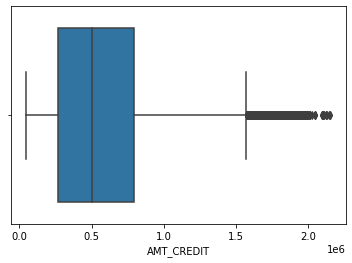

In [ ]:
# Binning 'AMT_CREDIT'
#Check if 'AMT_CREDIT' have any outliers
sns.boxplot(New_Data.AMT_CREDIT)

There are no such outliers. So it can be binned directly.

In [ ]:
#Binning of "AMT_CREDIT"
New_Data["AMT_CREDIT_GROUP"] = pd.qcut(New_Data.AMT_CREDIT, q=[0,0.2,0.4,0.6,0.8,1], 
                                         labels=['Very Low','Low','Medium','High','Very High'])

In [ ]:
New_Data.AMT_CREDIT_GROUP.value_counts()

Medium       59990
Low          59602
Very Low     59602
Very High    59572
High         59216
Name: AMT_CREDIT_GROUP, dtype: int64

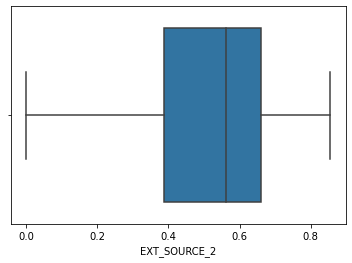

In [ ]:
# Analysing the 'EXT_SOURCE_2' and imputing the missing values
# Binning 'EXT_SOURCE_2'
sns.boxplot(New_Data.EXT_SOURCE_2)

As it do not have any outliers and it is a continous variable so we will impute the median as missing value

In [ ]:
# Imputing the null values with median
New_Data.EXT_SOURCE_2.fillna(New_Data.EXT_SOURCE_2.median(), inplace=True)

In [ ]:
# Binning of the 'EXT_SCORE_2'
New_Data["SCORE_2"] = pd.cut(New_Data.EXT_SOURCE_2, bins=5, 
                                         labels=['Very Low','Low','Medium','High','Very High'])

In [ ]:
New_Data.SCORE_2.value_counts()

High         120668
Medium        59805
Very High     56392
Low           38948
Very Low      22169
Name: SCORE_2, dtype: int64

In [ ]:
# Final Check of the data
New_Data.isnull().sum().sort_values(ascending= False)

OCCUPATION_TYPE                93958
EXT_SOURCE_3                   59074
SCORE_2                            0
AMT_GOODS_PRICE                    0
DAYS_REGISTRATION                  0
DAYS_EMPLOYED                      0
DAYS_BIRTH                         0
NAME_HOUSING_TYPE                  0
NAME_FAMILY_STATUS                 0
NAME_EDUCATION_TYPE                0
NAME_INCOME_TYPE                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_INCOME_TOTAL                   0
CNT_CHILDREN                       0
FLAG_OWN_REALTY                    0
FLAG_OWN_CAR                       0
CODE_GENDER                        0
NAME_CONTRACT_TYPE                 0
TARGET                             0
DAYS_ID_PUBLISH                    0
CNT_FAM_MEMBERS                    0
AMT_CREDIT_GROUP                   0
LIVE_CITY_NOT_WORK_CITY            0
AMT_ANNUITY_GROUP                  0
GOODS_PRICE_GROUP                  0
INCOME_GROUP                       0
A

In [ ]:
New_Data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'AGE', 'AGE_GROUP', 'INCOME_GROUP', 'GOODS_PRICE_GROUP',
       'AMT_ANNUITY_GROUP', 'AMT_CREDIT_GROUP', 'SCORE_2'],
      dtype='object')

In [ ]:
New_Data_Final = New_Data[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 
        'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
        'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
        'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'AGE', 'AGE_GROUP', 'INCOME_GROUP', 'GOODS_PRICE_GROUP',
       'AMT_ANNUITY_GROUP', 'AMT_CREDIT_GROUP', 'SCORE_2']]

In [ ]:
New_Data_Final.shape

(297982, 39)

## Analysis of the Data
### Analysis of New Data

In [ ]:
# Checking the imbalance in the data using the target column--- 'TARGET'
New_Data_Final.TARGET.value_counts(normalize=True)*100

0    91.806888
1     8.193112
Name: TARGET, dtype: float64

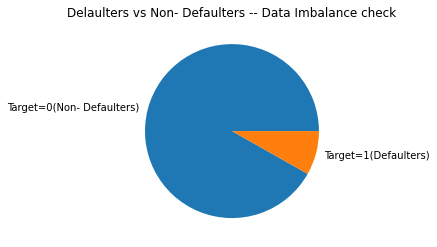

In [ ]:
plt.pie(New_Data_Final.TARGET.value_counts(normalize=True)*100, labels= ["Target=0(Non- Defaulters)", "Target=1(Defaulters)"])
plt.title("Delaulters vs Non- Defaulters -- Data Imbalance check")
plt.show()

As we can see there is a huge imbalance in the data as there are 8.2% of the population who have defaulted and 91.8% of the population have not.

In [ ]:
# Seperating the target variable "TARGET" for better analysis
New_Data_0 = New_Data_Final[New_Data_Final.TARGET == 0]  # Non-Defaulters
New_Data_1 = New_Data_Final[New_Data_Final.TARGET == 1]  # Defaulters

### Uni-variate Analysis

In [ ]:
# Defining a function for the univariate analysis
def uni_count(col):
    plt.figure(figsize= (12,4))
    sns.set_style("darkgrid")
    
    plt.subplot(1,2,1)
    sns.countplot(data = New_Data_0, x= col)
    plt.title("Distribution of "+col+" for Non-Defaulters")
    plt.xticks(rotation= 70)
    
    plt.subplot(1,2,2)
    sns.countplot(data = New_Data_1, x= col)
    plt.title("Distribution of "+col+" for Defaulters")
    plt.xticks(rotation= 70)
    plt.show()

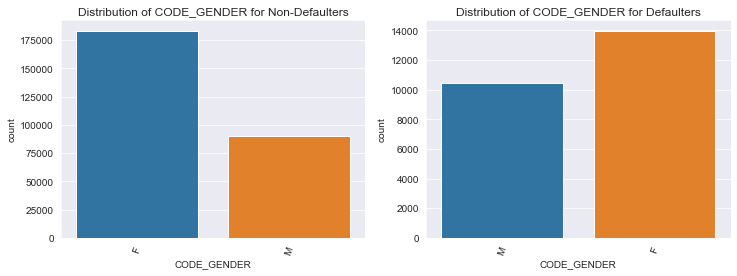

In [ ]:
uni_count('CODE_GENDER')

As there are more female who takes the loan, so their number in both the default and non-default have a similar trend. But the males constitute a higher proportion in the default section.

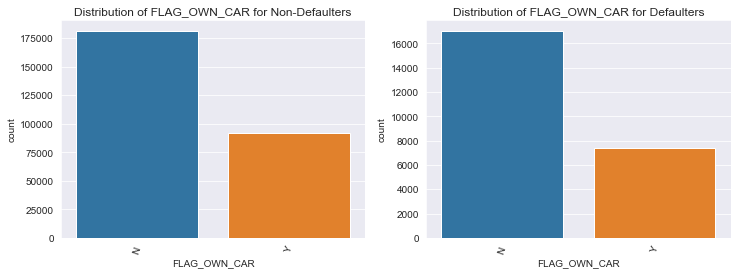

In [ ]:
uni_count('FLAG_OWN_CAR')

Owning and not owning a car does not seem to have a effect on the defaulting of the loan. Both car owners and non car owners behave almost the similar way, while there are very little higher proportion in the non defaulters who own a car.

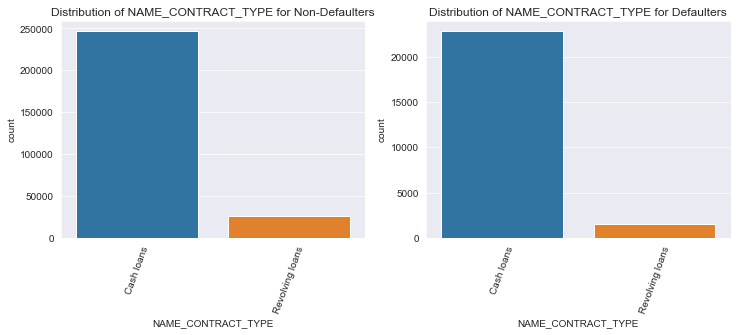

In [ ]:
uni_count('NAME_CONTRACT_TYPE')

People tend to take cash loans much more than the revolving loans as sometimes the interest on the revolving loan is higher and the approved ammount is lower than the traditional loans.
And the revolving loan have a little higher proportion of non-delaulters.

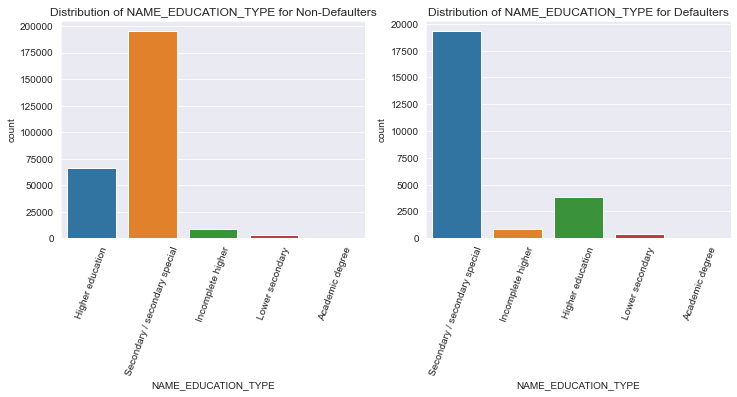

In [ ]:
uni_count('NAME_EDUCATION_TYPE')

All the education type behave the same way in all the education type where as the higher education people default less with proportion to their default population.

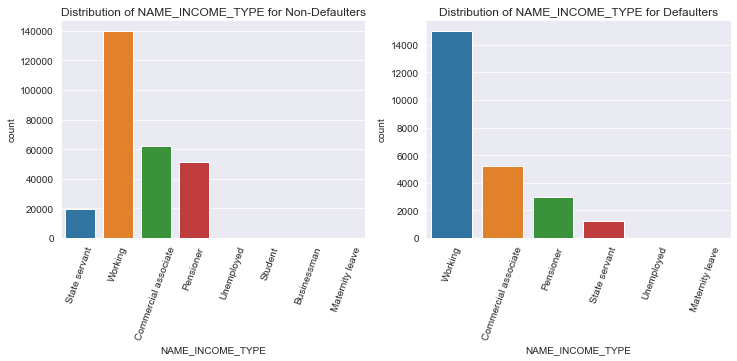

In [ ]:
uni_count('NAME_INCOME_TYPE')

Students and Businessmen donot default at all. and Working class professionals use to take more loans comparatively to other class of the population.

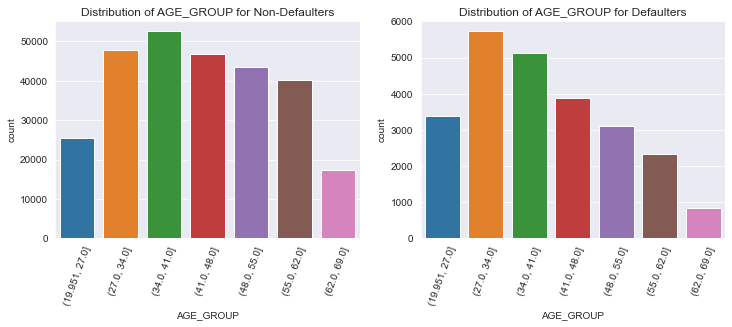

In [ ]:
uni_count('AGE_GROUP')

As the age increases the intake of loan decreases and so accordingly the non-defaulters also increases from the age of 27. It might happen due to the fact that, as age increases, people's salary increases and they are not much dependant on loans. 

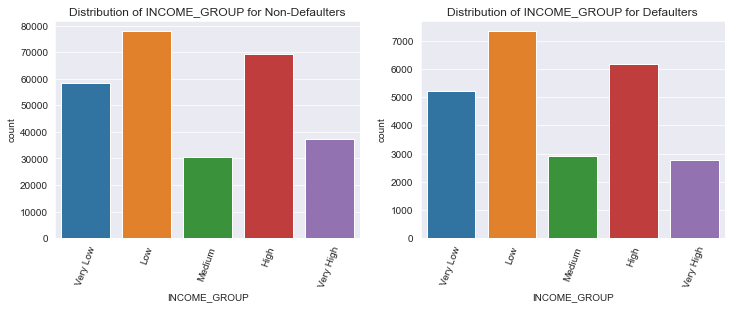

In [ ]:
uni_count('INCOME_GROUP')

Medium income group tends to take less loans than other groups as the low tier groups might need the money for their some basic needs and the higher income group might need the loan amount for some of their other lavish needs.

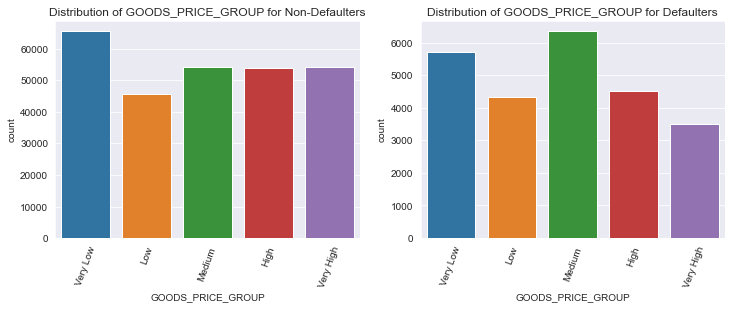

In [ ]:
uni_count('GOODS_PRICE_GROUP')

The loan taken on medium range priced goods default more than the others, and loan on very high range default less.

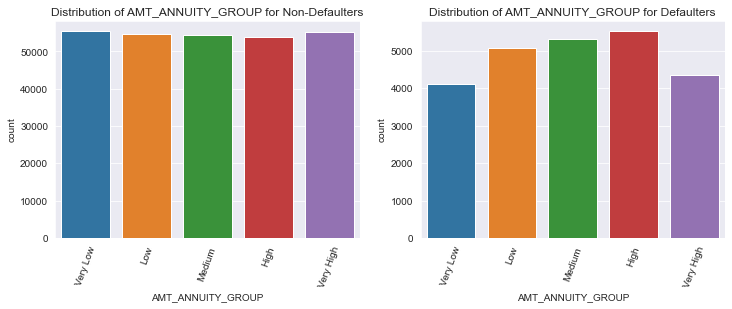

In [ ]:
uni_count('AMT_ANNUITY_GROUP')

The non defaulters have a similar kind of behaviour in all the ranges of the annuity ammount. But the high ammount annuity group people default more than the other groups.

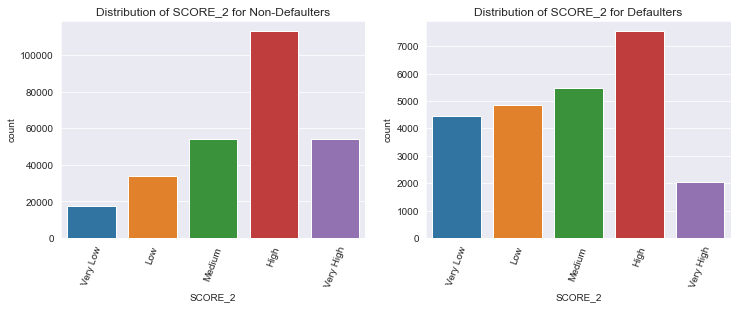

In [ ]:
uni_count('SCORE_2')

With the increase in the external score we can see there is a rise in the non defaulters. And there is a dip in the number of loan taken by the very high group from the high group.

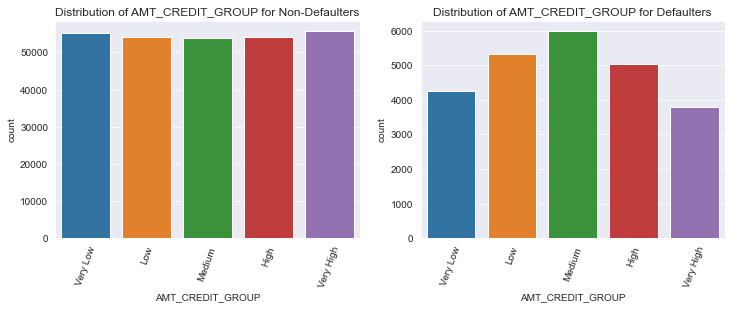

In [ ]:
uni_count('AMT_CREDIT_GROUP')

The Defaulter have a bell curve type structure and the medium credit group default very much often than the others.

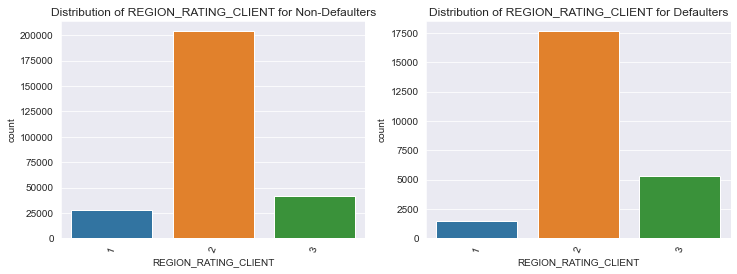

In [ ]:
uni_count('REGION_RATING_CLIENT')

The Tier 2 city people use to take more loans than the other tier city poeple. The tier 1 city people default less where as the tier 3 city people default more in proportion.

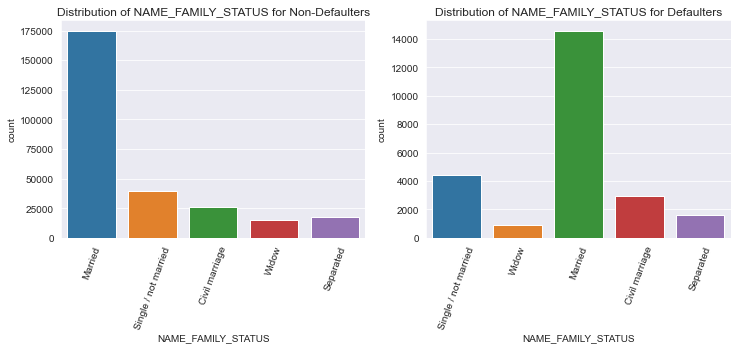

In [ ]:
uni_count('NAME_FAMILY_STATUS')

The married people tend to take more loans then the others. Civil Marriage and Single people default little more in proportion. Widow people have lesser chance of default.

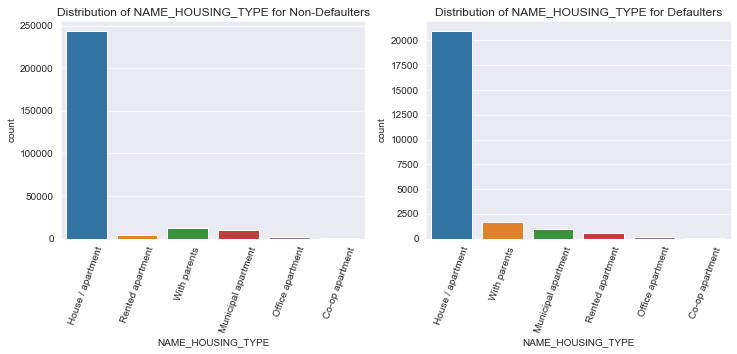

In [ ]:
uni_count('NAME_HOUSING_TYPE')

We can see that people with house or appartment takes more loans than other. People with parents default a little more, might be due to the extra living cost living with them.

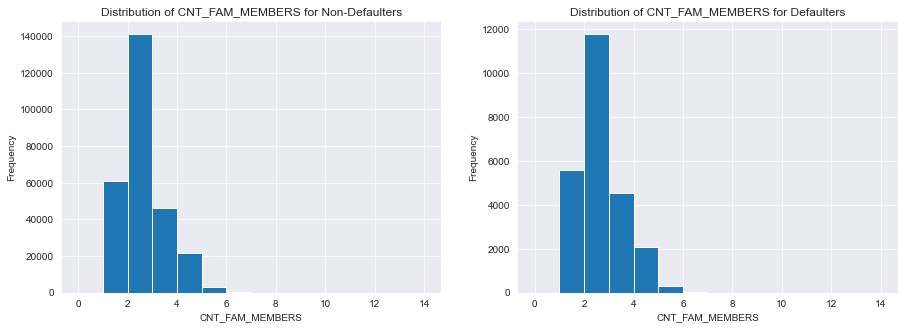

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
New_Data_0['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title('Distribution of CNT_FAM_MEMBERS for Non-Defaulters')
plt.xlabel("CNT_FAM_MEMBERS")

plt.subplot(1, 2, 2)
New_Data_1['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title(f'Distribution of CNT_FAM_MEMBERS for Defaulters')
plt.xlabel("CNT_FAM_MEMBERS")

plt.show()

We can see that people with family member count of 3 take more loans.

### Bi-Variate Analysis

In [ ]:
# function to plot scatterplots for bivariate analysis

def biv_scatter(col1,col2):
    plt.figure(figsize=[15,5])
    sns.set_style('darkgrid')
    
    plt.subplot(1,2,1)
    sns.scatterplot(data=New_Data_0, x=col1, y=col2)
    plt.title(col1+" VS "+col2+" for Non-Defaulters")
    plt.xticks(rotation=70)
    
    plt.subplot(1,2,2)
    sns.scatterplot(data=New_Data_1, x=col1, y=col2)
    plt.title(col1+" VS "+col2+" for Defaulters")
    plt.xticks(rotation=70)
    

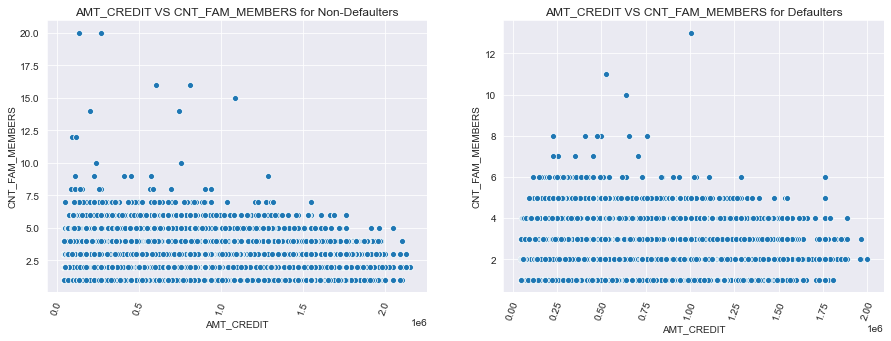

In [ ]:
biv_scatter('AMT_CREDIT','CNT_FAM_MEMBERS')

We can see that the density in the lower left corner is similar in both the case, so the people are equally likely to default if the family is small and the AMT_CREDIT is low. We can observe that larger families and people with larger AMT_CREDIT default less often.

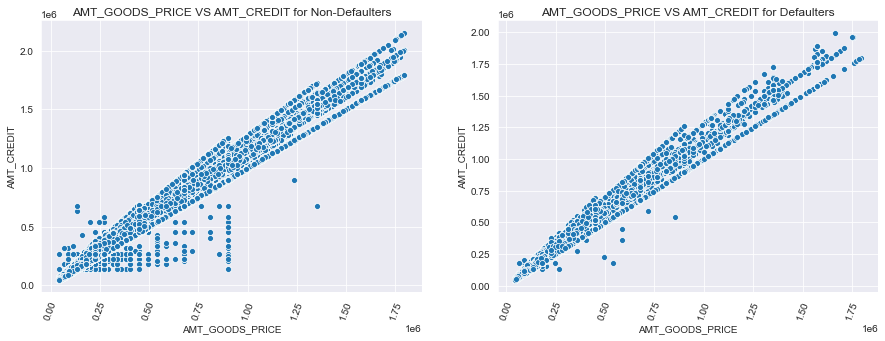

In [ ]:
biv_scatter('AMT_GOODS_PRICE','AMT_CREDIT')

We can see that the AMT_CREDIT and AMT_GOODS_PRICE are highly corelated to each other. And for some whose AMT_GOODS_PRICE is higher and AMT_CREDIT is lower, they are much into a non defaulter section.

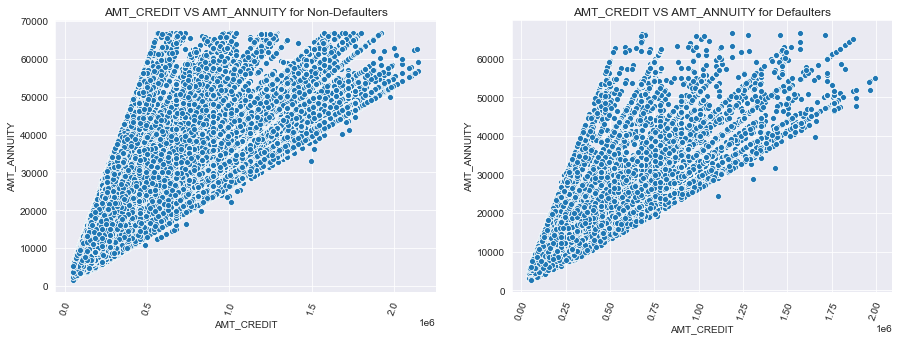

In [ ]:
biv_scatter('AMT_CREDIT','AMT_ANNUITY')

Here we can inffer that AMT_CREDIT and AMT_ANNUITY also have a high corelation, and the people with high AMT_CREDIT and AMT_ANNUITY tends to default less.

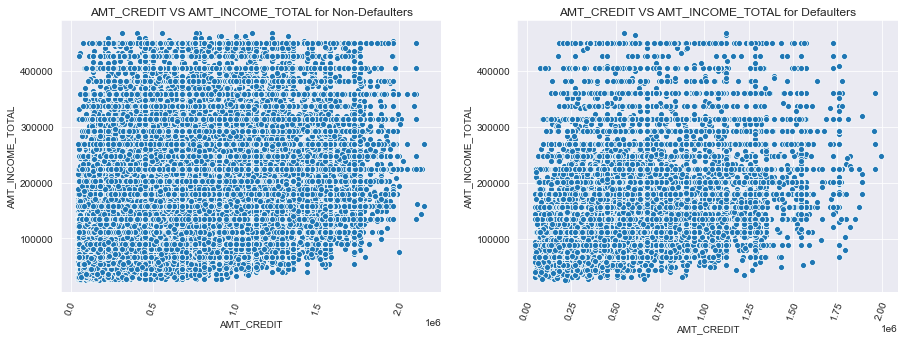

In [ ]:
biv_scatter('AMT_CREDIT','AMT_INCOME_TOTAL')

The lower AMT_CREDIT and AMT_INCOME_TOTAL gives a similar trend for defaulters and non-defaulters, but for higher of both values there are less number of people wo defaults.

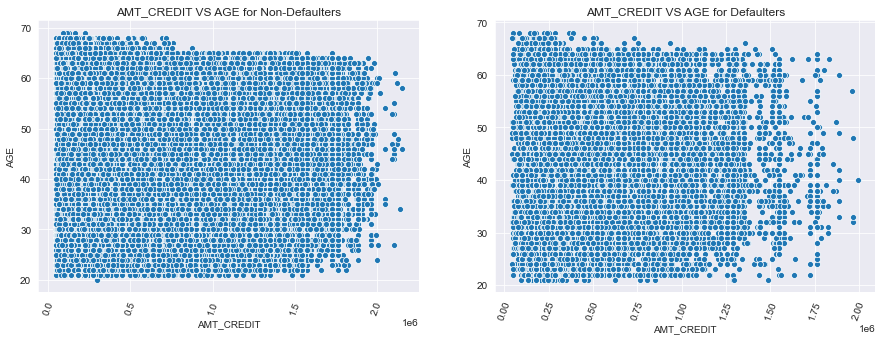

In [ ]:
biv_scatter('AMT_CREDIT','AGE')

The AGE and AMT_CREDIT amount behave the same for lower to high vaue of the credit amount. But the people not default much if the credit amount is on a higher side.

In [ ]:
# function to plot Bar charts for bivariate analysis

def biv_bar(col1,col2):
    plt.figure(figsize=[15,5])
    sns.set_style('darkgrid')
    
    plt.subplot(1,2,1)
    sns.barplot(data=New_Data_0, x=col1, y=col2)
    plt.title(col1+" VS "+col2+" for Non-Defaulters")
    plt.xticks(rotation=70)
    
    plt.subplot(1,2,2)
    sns.barplot(data=New_Data_1, x=col1, y=col2)
    plt.title(col1+" VS "+col2+" for Defaulters")
    plt.xticks(rotation=70)

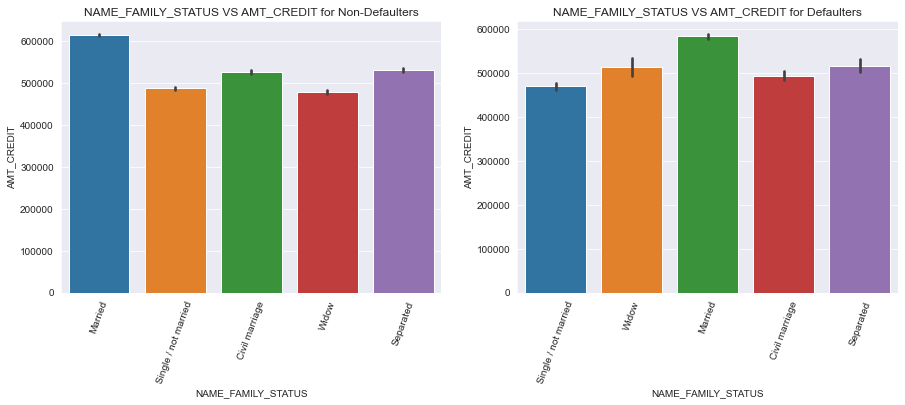

In [ ]:
biv_bar('NAME_FAMILY_STATUS', 'AMT_CREDIT')

As we have seen before the married tends to high number of loans so they also take a higher amount of loan credit. And even if the Widow default less they take high amount of loan credit. And for Civil married and single people as they default more often it might be because they have a litle higher loan credit amount.

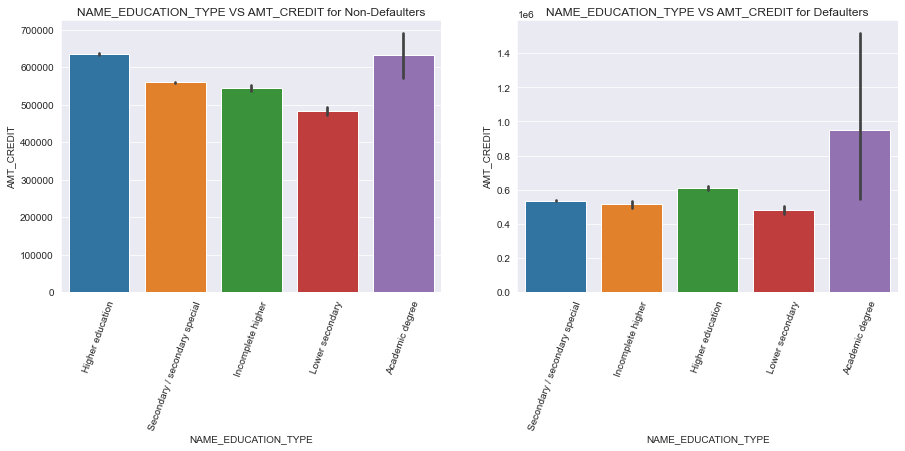

In [ ]:
biv_bar('NAME_EDUCATION_TYPE','AMT_CREDIT')

We can see over here that the lower amount credited by people under any education type is defaulting. And even if the higher education people take higher amount of credit they default less (from our previous inference).

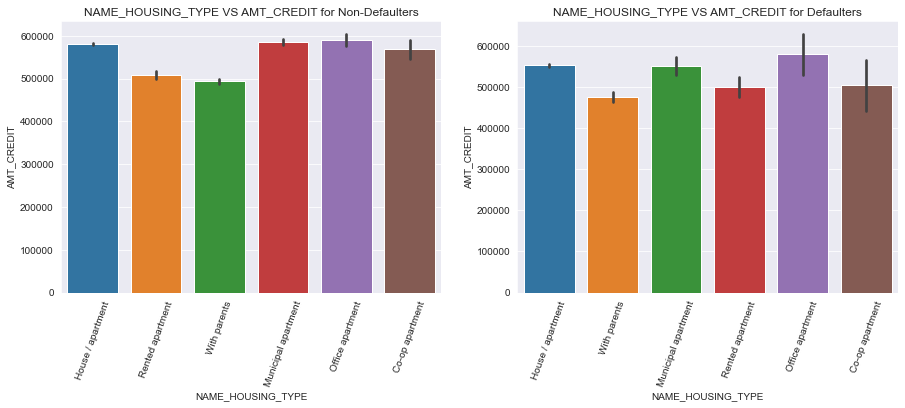

In [ ]:
biv_bar('NAME_HOUSING_TYPE','AMT_CREDIT')

Populaton in Office appartment takes high credit amount as loan and here also the higher credit amount population default less than the comparitively lower credit amount population in each housing category.

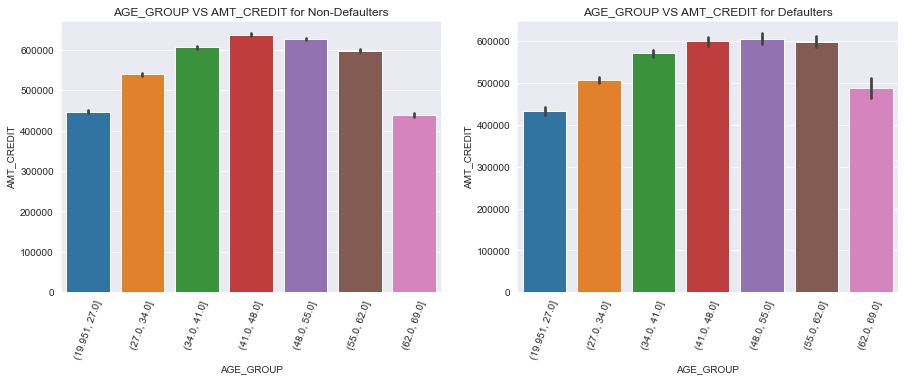

In [ ]:
biv_bar('AGE_GROUP','AMT_CREDIT')

There is not much of a trend noticed in the age group and credit amount combination in the default and non default section, but we can see as the age increases the amount credited also increases.

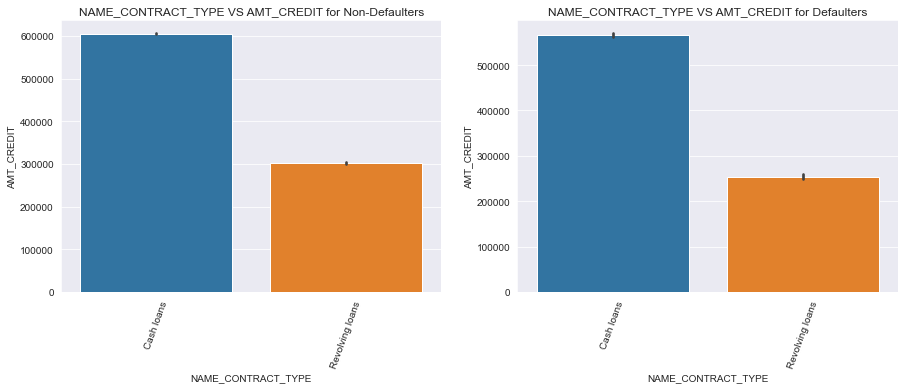

In [ ]:
biv_bar('NAME_CONTRACT_TYPE','AMT_CREDIT')

As we know, in the revolving loans the amount approved for the loan or the amount credit is less. So fom the previous and the plot above we can see that the revolving loan has a little lesser proportion of non-defaulters.

### Multi-Variate Analysis:

In [ ]:
# function to plot boxplots for multi-variate analysis
def multiplot(col1,col2,col3):
    plt.figure(figsize=[20,12])
    sns.set_style('whitegrid')
    
    plt.subplot(2,1,1)
    sns.boxplot(data=New_Data_0, x=col1, y=col2, hue=col3)
    plt.title(col1+" VS "+ col2+ " For Non_Defaulters")
    plt.xticks(rotation=0)
    plt.legend(loc="upper right", bbox_to_anchor=[1,1])
        
    plt.subplot(2,1,2)
    sns.boxplot(data=New_Data_1, x=col1, y=col2, hue=col3)
    plt.title(col1+" VS "+ col2+ " For Defaulters")
    plt.xticks(rotation=0)
    plt.legend(loc="upper right", bbox_to_anchor=[1,1])
    
    plt.show()

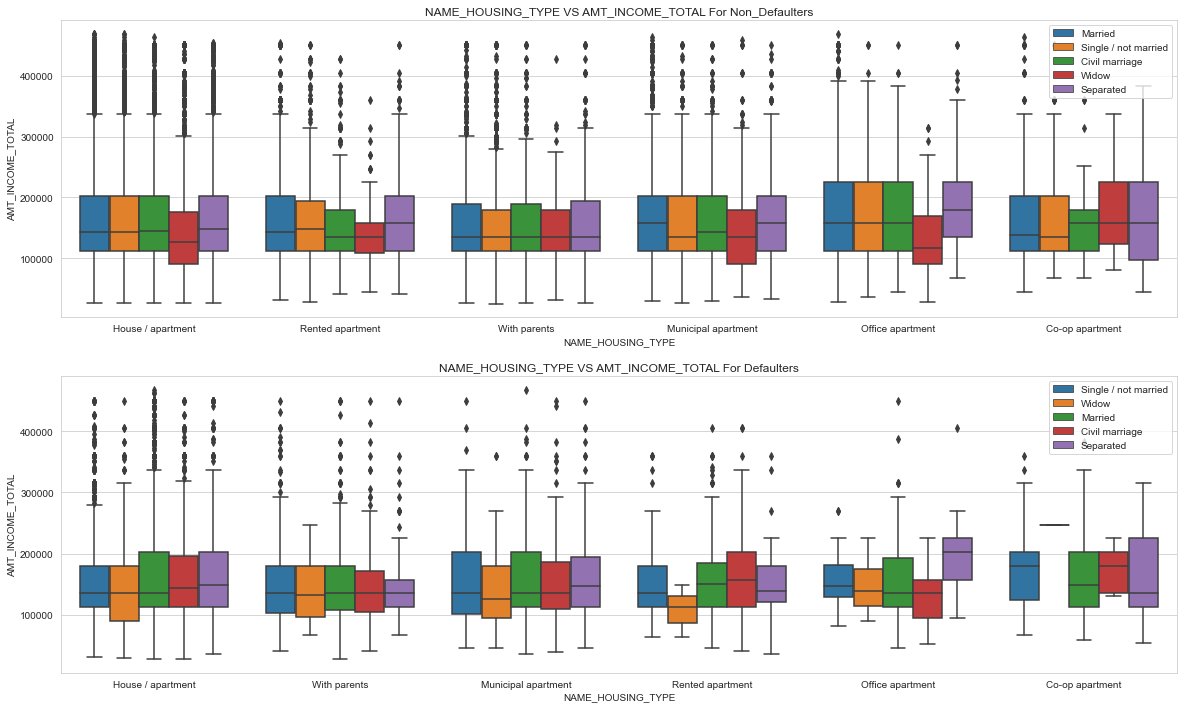

In [ ]:
multiplot('NAME_HOUSING_TYPE','AMT_INCOME_TOTAL','NAME_FAMILY_STATUS')

We can see that the high total income people irrespective of housing type and family status do not defailt much.

And the median income of Widow who are non defaulting is on a lower side. Again Married population have a higher income range and widow population have a low income range and both of the combinations default less. 

We also can see the Office appartment section haing a high anual income range in the non-defaulting section. Widows staying at a co-op appartment do not default at all.

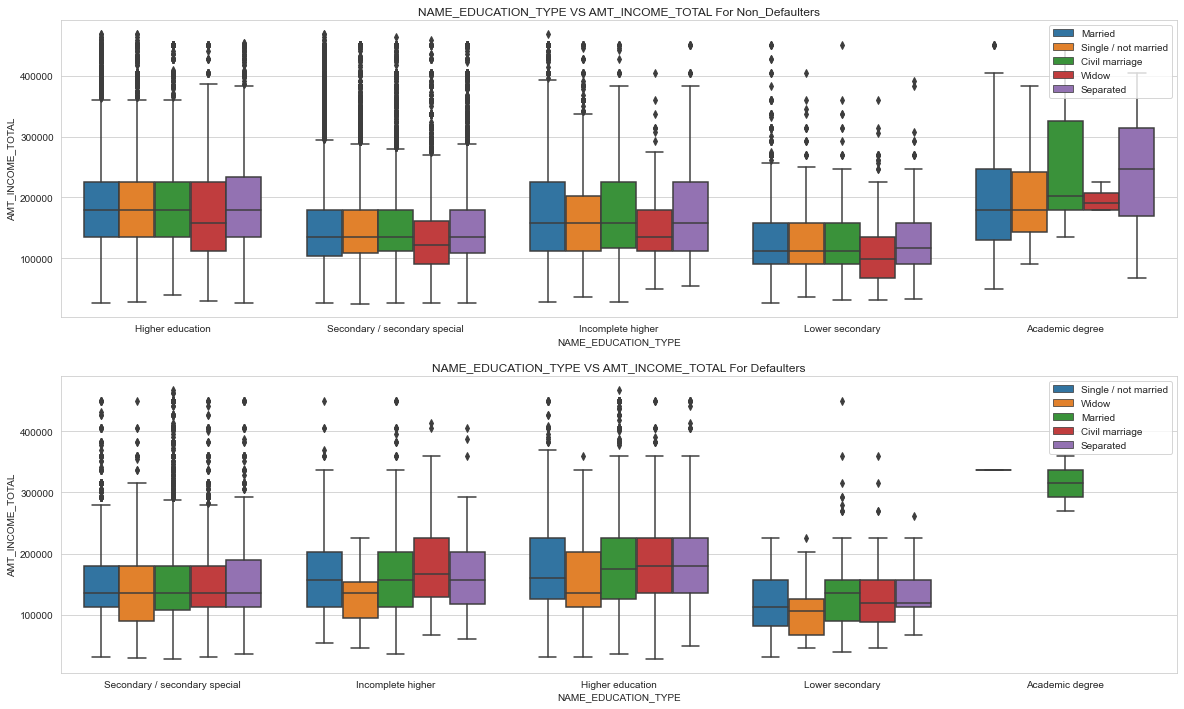

In [ ]:
multiplot('NAME_EDUCATION_TYPE','AMT_INCOME_TOTAL','NAME_FAMILY_STATUS')

As we seen before the Academic Degree population default less, so we got to know here that the married population in the academic degree population is the only section that defaults and the widows to a very negligible amount.

We now confirmed here that the lower secondary people having less income use to default more. And the Widows not defaulting in the lower secondary section have a lesser median than the others in the group.

The people having academic degree seemto be the perfect group for the loan as they do not default much.

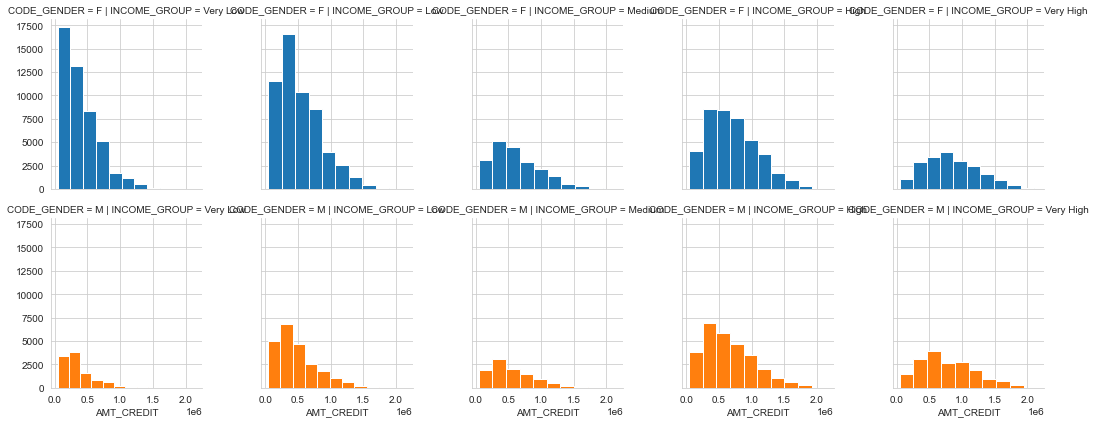

In [ ]:
g = sns.FacetGrid(data=New_Data_0, row='CODE_GENDER', col='INCOME_GROUP', hue='CODE_GENDER')
g = g.map(plt.hist, 'AMT_CREDIT')
plt.show()

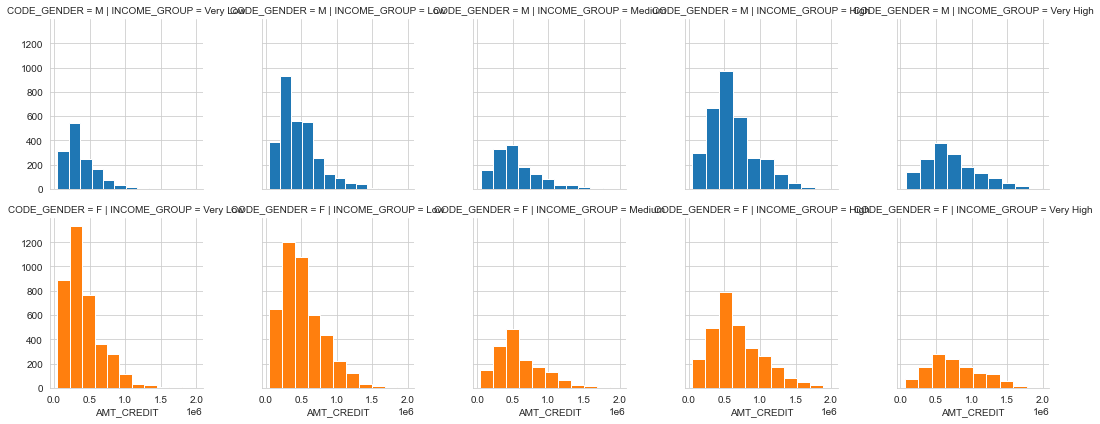

In [ ]:
h = sns.FacetGrid(data=New_Data_1, row='CODE_GENDER', col='INCOME_GROUP', hue='CODE_GENDER')
h = h.map(plt.hist, 'AMT_CREDIT')
plt.show()

In [ ]:
New_Data_1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'AGE',
       'AGE_GROUP', 'INCOME_GROUP', 'GOODS_PRICE_GROUP', 'AMT_ANNUITY_GROUP',
       'AMT_CREDIT_GROUP', 'SCORE_2'],
      dtype='object')

In [ ]:
#Correlation Matrix and heatmap:

cols=['NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'AGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE','EXT_SOURCE_2']

In [ ]:
corr_New_1 = New_Data_1[cols].corr()
corr_New1_df = corr_New_1.where(np.triu(np.ones(corr_New_1.shape), k=1).astype(np.bool)).unstack().reset_index()
corr_New1_df.columns = ['VAR1', 'VAR2', 'Correlation']
corr_New1_df.dropna(subset = ['Correlation'], inplace = True)
corr_New1_df['Abs_Correlation'] = abs(corr_New1_df['Correlation'])

In [ ]:
# top 10 corelation for defaulters
corr_New1_df.sort_values(by = 'Abs_Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation,Abs_Correlation
31,AMT_GOODS_PRICE,AMT_CREDIT,0.981344,0.981344
76,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.957161,0.957161
21,AMT_ANNUITY,AMT_CREDIT,0.748863,0.748863
32,AMT_GOODS_PRICE,AMT_ANNUITY,0.746733,0.746733
20,AMT_ANNUITY,AMT_INCOME_TOTAL,0.406451,0.406451
30,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.330146,0.330146
10,AMT_CREDIT,AMT_INCOME_TOTAL,0.329047,0.329047
86,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT,-0.294311,0.294311
87,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,-0.276468,0.276468
96,EXT_SOURCE_2,REGION_RATING_CLIENT,-0.245854,0.245854


In [ ]:
# list of top 10 corelation for Defaulters
corr_New1_df.sort_values(by = 'Abs_Correlation', ascending = False).head(10)[['VAR1','VAR1']].values.tolist()

[['AMT_GOODS_PRICE', 'AMT_GOODS_PRICE'],
 ['REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT_W_CITY'],
 ['AMT_ANNUITY', 'AMT_ANNUITY'],
 ['AMT_GOODS_PRICE', 'AMT_GOODS_PRICE'],
 ['AMT_ANNUITY', 'AMT_ANNUITY'],
 ['AMT_GOODS_PRICE', 'AMT_GOODS_PRICE'],
 ['AMT_CREDIT', 'AMT_CREDIT'],
 ['HOUR_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START'],
 ['HOUR_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START'],
 ['EXT_SOURCE_2', 'EXT_SOURCE_2']]

In [ ]:
corr_New_0 = New_Data_0[cols].corr()
corr_New0_df = corr_New_0.where(np.triu(np.ones(corr_New_0.shape), k=1).astype(np.bool)).unstack().reset_index()
corr_New0_df.columns = ['VAR1', 'VAR2', 'Correlation']
corr_New0_df.dropna(subset = ['Correlation'], inplace = True)
corr_New0_df['Abs_Correlation'] = abs(corr_New0_df['Correlation'])

In [ ]:
# top 10 corelation for non- defaulters
corr_New0_df.sort_values(by = 'Abs_Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation,Abs_Correlation
31,AMT_GOODS_PRICE,AMT_CREDIT,0.985211,0.985211
76,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950049,0.950049
21,AMT_ANNUITY,AMT_CREDIT,0.777327,0.777327
32,AMT_GOODS_PRICE,AMT_ANNUITY,0.777259,0.777259
20,AMT_ANNUITY,AMT_INCOME_TOTAL,0.440189,0.440189
30,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.367429,0.367429
10,AMT_CREDIT,AMT_INCOME_TOTAL,0.363993,0.363993
54,CNT_FAM_MEMBERS,AGE,-0.287635,0.287635
96,EXT_SOURCE_2,REGION_RATING_CLIENT,-0.284568,0.284568
86,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT,-0.280732,0.280732


In [ ]:
# list top 10 corelation for non- defaulters
corr_New0_df.sort_values(by = 'Abs_Correlation', ascending = False).head(10)[['VAR1','VAR1']].values.tolist()

[['AMT_GOODS_PRICE', 'AMT_GOODS_PRICE'],
 ['REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT_W_CITY'],
 ['AMT_ANNUITY', 'AMT_ANNUITY'],
 ['AMT_GOODS_PRICE', 'AMT_GOODS_PRICE'],
 ['AMT_ANNUITY', 'AMT_ANNUITY'],
 ['AMT_GOODS_PRICE', 'AMT_GOODS_PRICE'],
 ['AMT_CREDIT', 'AMT_CREDIT'],
 ['CNT_FAM_MEMBERS', 'CNT_FAM_MEMBERS'],
 ['EXT_SOURCE_2', 'EXT_SOURCE_2'],
 ['HOUR_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']]

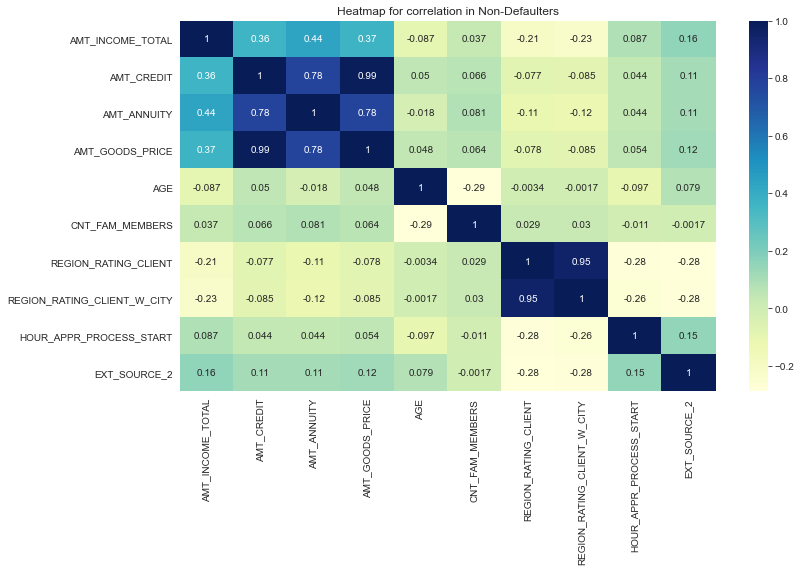

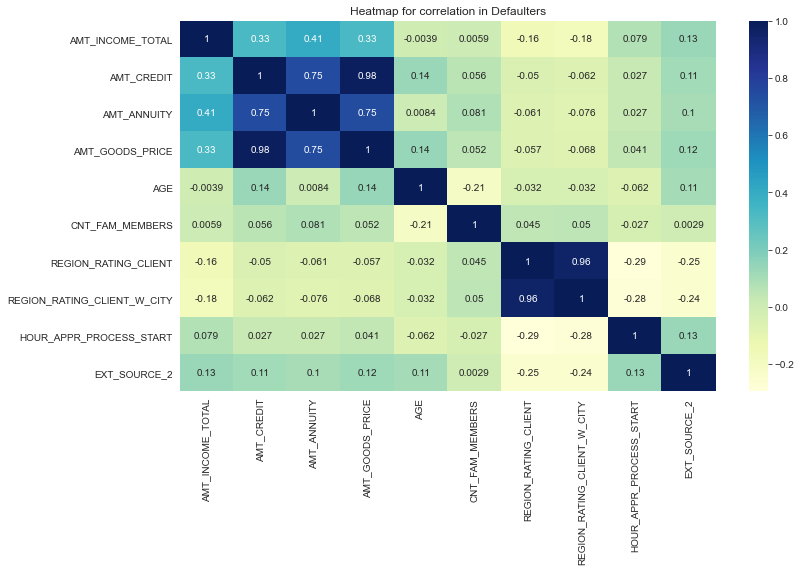

In [ ]:
# Heat map for the above corelation
plt.figure(figsize=[12,15])
plt.subplot(2,1,1)
heat1 = New_Data_0[cols].corr()
sns.heatmap(heat1, cmap='YlGnBu', annot=True)
plt.title("Heatmap for correlation in Non-Defaulters")
plt.show()

plt.figure(figsize=[12,15])
plt.subplot(2,1,2)
heat2 = New_Data_1[cols].corr()
sns.heatmap(heat2, cmap='YlGnBu', annot=True)
plt.title("Heatmap for correlation in Defaulters")

plt.show()

### Working on Previous Data

In [ ]:
# checking the percentage of null values in every column in descending order
(Prev_Data.isnull().sum()/len(Prev_Data)*100).sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

In [ ]:
# Removing the columns having null values more than 40%
Prev_Data = Prev_Data[Prev_Data.columns[Prev_Data.isnull().sum()/len(Prev_Data)*100 <= 40]]
Prev_Data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [ ]:
Prev_Data.shape

(1670214, 26)

In [ ]:
Prev_Data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [ ]:
Prev_Data.shape

(1670214, 26)

In [ ]:
#Target Variable is 'NAME_CONTRACT_STATUS'
(100*Prev_Data.NAME_CONTRACT_STATUS.value_counts(normalize=True))

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

### Analysis of the Data

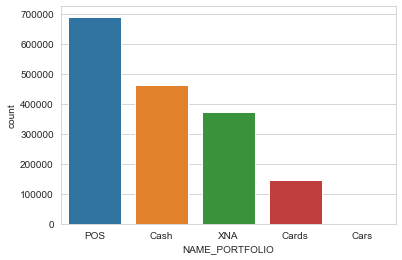

In [ ]:
sns.countplot(Prev_Data.NAME_PORTFOLIO)

People have taken much of a POS type of application.

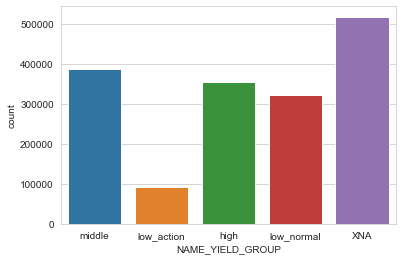

In [ ]:
sns.countplot(Prev_Data.NAME_YIELD_GROUP)

Many applications from previous application have a medium intrest rate applied to the loan.

### Uni Variate Analysis

In [ ]:
# function for univariate analysis
def uni_plot(var):
    plt.figure(figsize= (8,4))
    sns.set_style("darkgrid")
    
    sns.countplot(data = Prev_Data, x= var, hue= "NAME_CONTRACT_STATUS")
    plt.title("Distribution of "+var+" on NAME_CONTRACT_STATUS")
    plt.xticks(rotation= 70)
    plt.legend(loc="upper right")
    
    plt.show()

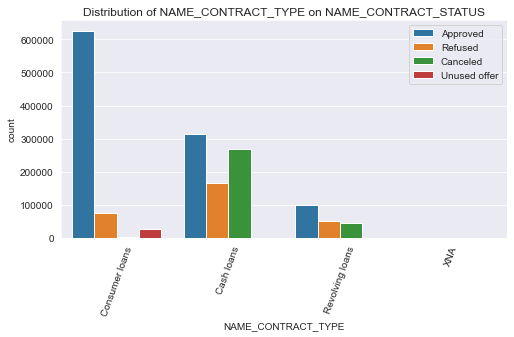

In [ ]:
uni_plot('NAME_CONTRACT_TYPE')

We can infer that no Consumer loans got cancelled, the cash loans have similar kind of approval and cancel rate. HUge ammount of consumer loans got approved.

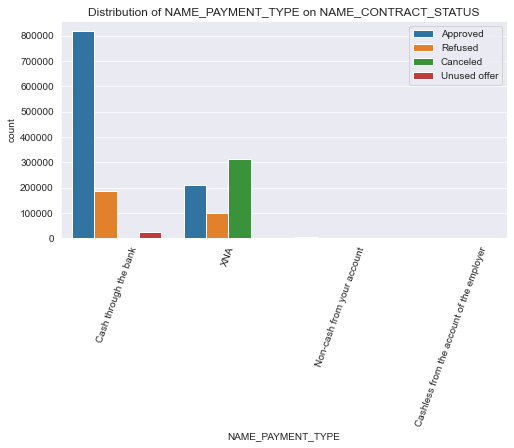

In [ ]:
uni_plot('NAME_PAYMENT_TYPE')

So we got to know that people prefer to pay through cash.

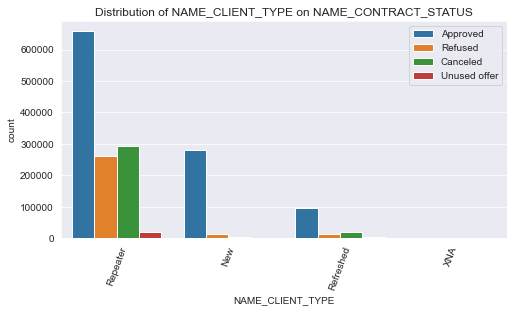

In [ ]:
uni_plot('NAME_CLIENT_TYPE')

There are very loyal customer to the bank who comes for the loan more number of times as the repeater number is very high.

### Bivariate Analysis

In [ ]:
# Functiom for bivariate analysis
def box_prev(col1):
    plt.figure(figsize=[10,8])
    sns.set_style('whitegrid')
    
    sns.boxplot(data=Prev_Data, x='NAME_CONTRACT_STATUS', y=col1)
    plt.title("NAME_CONTRACT_STATUS VS "+ col1)
    plt.xticks(rotation=0)
    
    plt.show()

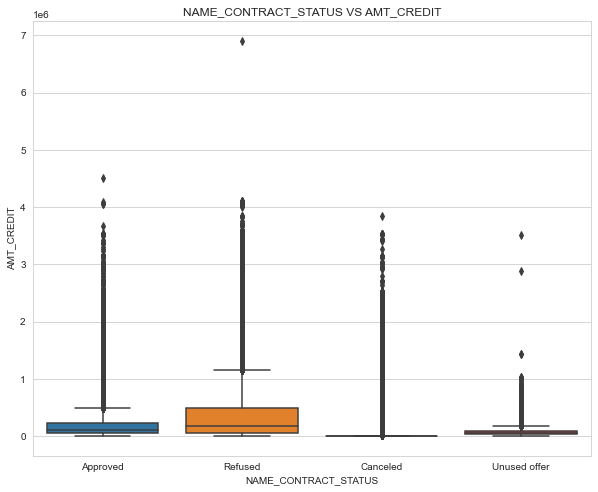

In [ ]:
box_prev('AMT_CREDIT')

The loans with high credit amount got refused by the bank.

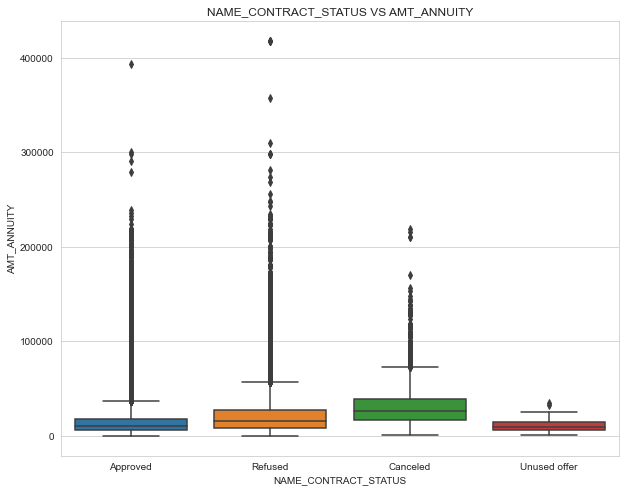

In [ ]:
box_prev('AMT_ANNUITY')

The loans with high annuity amount was refused by the clients at some point of time.

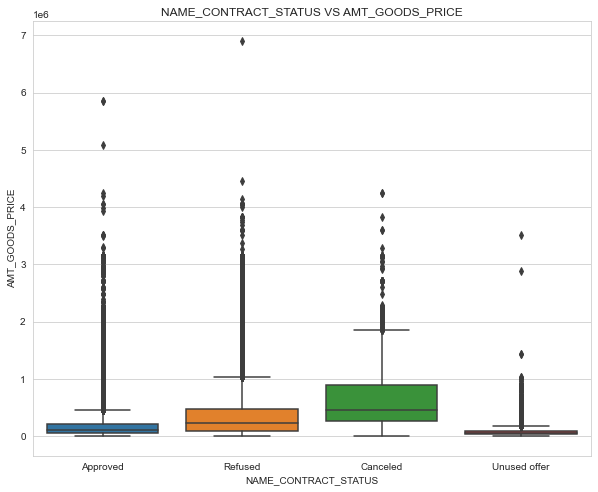

In [ ]:
box_prev('AMT_GOODS_PRICE')

The loans with high goods price was cancelled by the client at some point of time.

### Multivariate Analysis

In [ ]:
# Corelation of the previous application data
corr_Prev = Prev_Data.corr()
corr_Prev_df = corr_Prev.where(np.triu(np.ones(corr_Prev.shape), k=1).astype(np.bool)).unstack().reset_index()
corr_Prev_df.columns = ['VAR1', 'VAR2', 'Correlation']
corr_Prev_df.dropna(subset = ['Correlation'], inplace = True)
corr_Prev_df['Abs_Correlation'] = abs(corr_Prev_df['Correlation'])

In [ ]:
# top 10 corelation
corr_Prev_df.sort_values(by = 'Abs_Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation,Abs_Correlation
58,AMT_GOODS_PRICE,AMT_APPLICATION,0.999884,0.999884
59,AMT_GOODS_PRICE,AMT_CREDIT,0.993087,0.993087
47,AMT_CREDIT,AMT_APPLICATION,0.975824,0.975824
57,AMT_GOODS_PRICE,AMT_ANNUITY,0.820895,0.820895
46,AMT_CREDIT,AMT_ANNUITY,0.816429,0.816429
35,AMT_APPLICATION,AMT_ANNUITY,0.808872,0.808872
113,CNT_PAYMENT,AMT_APPLICATION,0.680630,0.680630
114,CNT_PAYMENT,AMT_CREDIT,0.674278,0.674278
115,CNT_PAYMENT,AMT_GOODS_PRICE,0.672129,0.672129
112,CNT_PAYMENT,AMT_ANNUITY,0.394535,0.394535


In [ ]:
corr_Prev_df.sort_values(by = 'Abs_Correlation', ascending = False).head(10)[["VAR1","VAR2"]].values.tolist()

[['AMT_GOODS_PRICE', 'AMT_APPLICATION'],
 ['AMT_GOODS_PRICE', 'AMT_CREDIT'],
 ['AMT_CREDIT', 'AMT_APPLICATION'],
 ['AMT_GOODS_PRICE', 'AMT_ANNUITY'],
 ['AMT_CREDIT', 'AMT_ANNUITY'],
 ['AMT_APPLICATION', 'AMT_ANNUITY'],
 ['CNT_PAYMENT', 'AMT_APPLICATION'],
 ['CNT_PAYMENT', 'AMT_CREDIT'],
 ['CNT_PAYMENT', 'AMT_GOODS_PRICE'],
 ['CNT_PAYMENT', 'AMT_ANNUITY']]

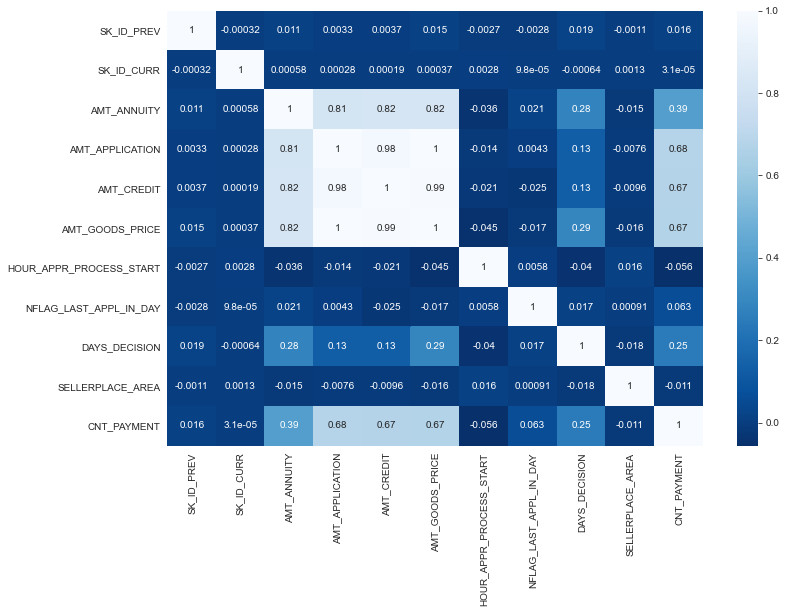

In [ ]:
plt.figure(figsize=[12,8])
sns.heatmap(corr_Prev, cmap="Blues_r", annot=True)

### CONCLUSION drawn from APPLICATION DATASET:

- There are more female who takes the loan, but the males consitute a higher proportion in the default section.
- People tend to take the cash loans much more than the revolving loans.
- Students and Businessmans donot default at all. And Working class professionals use to take more loans comparatively to other class of the population.
- As the age age increases the intake of loan also decreases and so accordingly the non-defaulters also increases from the age of 27. 
- With the increase in the external score we can see there is a rise in the non defaulters. And there is a dip in the number of loan taken by the very high group from the high group.
- The loan taken on medium range priced goods default more than the others, and loan on very high range default less, the medium credit group default very much often than the others.
- The married people tend to take more loans then the others. Civil Marriage and Single people default little more in proportion. Widow people have lesser chance of default.


- We can see that the density in the lower left corner is similar in both the case, so the people are equally likely to default if the family is small and the AMT_CREDIT is low. We can observe that larger families and people with larger AMT_CREDIT default less often.
- We can see that the AMT_CREDIT and AMT_GOODS_PRICE, and  AMT_CREDIT and AMT_ANNUITY also have a high corelation.
- The lower AMT_CREDIT and AMT_INCOME_TOTAL gives a similar trend for defaulters and non-defaulters, but for higher of both values there are less number of people wo defaults.
- The AGE and AMT_CREDIT ammount behave the same for lower to high vaue of the credit amount. But the people not default muh if the credit ammount is on a higher side.


- The married tends to high number of loans so they also take a higher amount of loan credit. And even if the Widow default less they take high amount of loan credit. And for Civil married and single people as they default more often it might be because they have a litle higher loan credit amount.
- The lower amount credited by people under any education type is defaulting. And even if the higher education people take higher amount of credit they default less.
- The higher credit amount population default less than the comparitively lower credit amount population in each housing category.
- We can see as the age increases the amount credited also increases.
- In the revolving loans the ammount approved for the loan or the amount credit is less. The revolving loan has a little lesser proportion of non-defaulters.


- We can see that the high total income people irrespective of housing type and family status do not defailt much.
- And the median income of Widow who are non defaulting is on a lower side. Again Married population have a higher income range and widow population have a low income range and both of the combinations default less.
- We also can see the Office appartment section haing a high anual income range in the non-defaulting section. Widows staying at a co-op appartment donot default.


- As we seen before the Academic Degree population default less, so we got to know here that the married population in the academic degree population is the only section that defaults and the widows to a very negligible amount.
- We now confirmed here that the lower sencondary people having less income use to default more. And the Widows not defaulting in the lower secondary section have a lesser median than the others in the group.
- The people having academic degree seemto be the perfect group for the loan as they do not default much.



### CONCLUSION drawn from PREVIOUS DATASET:

- We can infer that no Consumer loans got cancelled, the cash loans have similar kind of approval and cancel rate. Huge amount of consumer loans got approved.

- So we got to know that people prefer to pay through cash.

- There are very loyal customer to the bank who comes for the loan more number of times as the repeater number is very high.

- The loans with high credit amount got refused by the bank.

- The loans with high goods price was cancelled by the client at some point of time.
